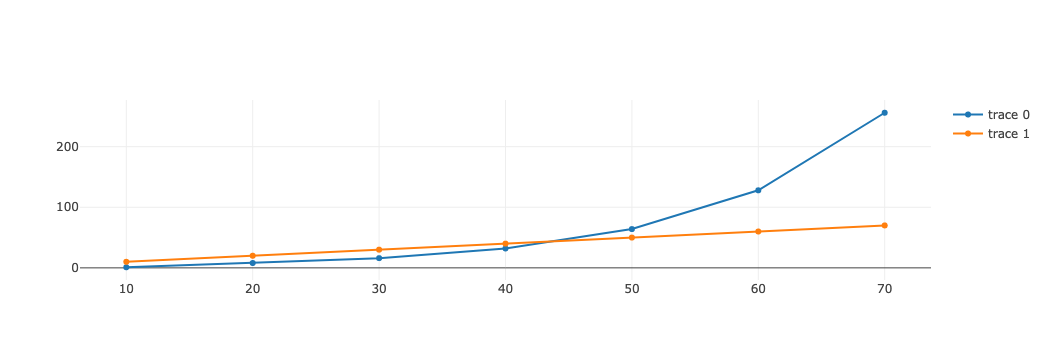

import $ivy.$                                      

import plotly._

import plotly.element._

import plotly.layout._

import plotly.Almond._


x: Seq[Int] = List(10, 20, 30, 40, 50, 60, 70)
y: Seq[Int] = List(1, 8, 16, 32, 64, 128, 256)
x2: Seq[Int] = List(10, 20, 30, 40, 50, 60, 70)
y2: Seq[Int] = List(10, 20, 30, 40, 50, 60, 70)
trace1: Scatter = Scatter(
  Some(Doubles(List(10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0))),
  Some(Doubles(List(1.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256.0))),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None
)
trace2: Scatter = Scatter(
  Some(Doubles(List(10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0))),
  Some(Doubles(List(10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0))),
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None
)
data: Seq[Scatter] = List(
  Scatter(
    Some

In [2]:
import $ivy.`org.plotly-scala::plotly-almond:0.8.1`
interp.load.cp(os.Path(os.RelPath("../target/scala-2.13/pp_2.13-0.1.0-SNAPSHOT.jar"), os.pwd))

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._

val (x, y) = Seq(
    10 -> 1,
    20 -> 8,
    30 -> 16,
    40 -> 32,
    50 -> 64,
    60 -> 128,
    70 -> 256
).unzip

val (x2, y2) = Seq(
    10 -> 10,
    20 -> 20,
    30 -> 30,
    40 -> 40,
    50 -> 50,
    60 -> 60,
    70 -> 70
).unzip

val trace1 = Scatter(x,y)

val trace2 = Scatter(x2,y2)

val data = Seq(trace1, trace2)

plot(data)

In [ ]:
import parallel.common.ParallelismDepth._
import parallel.common.TestRunner
import parallel.common.Interf.Sizeable
import parallel.common.ForkJoinParallel._
import parallel.parCollections.ParArray
import org.scalameter._

def testParArrayMap[A,  B: Manifest](cols: Seq[ParArray[A]], pds: Seq[ParallelismDepth[ParArray[A]]], f: A => B): Unit = {

    def seqOp(arr: ParArray[A]) = arr.mapSeq(f)
    def parOp(arr: ParArray[A], pd: ParallelismDepth[ParArray[A]]) = {
      implicit val parallelismDepth: ParallelismDepth[ParArray[A]] = pd
      arr.mapPar(f)
    }

    val tr = new TestRunner[ParArray[A]](seqOp)

    tr.runallTests(
      parOp,
      cols,
      pds)

  }

val cols = Seq(
      /*new ParArray[Int](Array.fill(20)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(200)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(2000)(scala.util.Random.nextInt(100))),*/
      new ParArray[Int](Array.fill(20000)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(200000)(scala.util.Random.nextInt(100))),
      new ParArray[Int](Array.fill(2000000)(scala.util.Random.nextInt(100))),
      )

val pds = Seq[ParallelismDepth[ParArray[Int]]](
  ParallelismDepth.partitionsExp[ParArray[Int]](1),
  ParallelismDepth.partitionsExp[ParArray[Int]](2),
  ParallelismDepth.partitionsExp[ParArray[Int]](3),
  ParallelismDepth.partitionsExp[ParArray[Int]](4),
  ParallelismDepth.partitionsExp[ParArray[Int]](5),
  ParallelismDepth.partitionsExp[ParArray[Int]](6),
  ParallelismDepth.partitionsExp[ParArray[Int]](7),
  ParallelismDepth.partitionsExp[ParArray[Int]](8),
  ParallelismDepth.partitionsExp[ParArray[Int]](9),
  ParallelismDepth.nCores()
)

def fMap(el: Int): Double = scala.math.pow(el, 2)
def fReduce(a: Int, b: Int): Int = a + b

println(
  """
    |TESTING MAP
    |==================
    |
    |
    |""".stripMargin)

testParArrayMap[Int, Double](cols, pds, fMap)

java.io.IOException: Scala signature ParallelismDepth has wrong version
 expected: 5.0
 found: 5.2 in ParallelismDepth.class
	at scala.reflect.internal.pickling.UnPickler$Scan.checkVersion(UnPickler.scala:124)
	at scala.reflect.internal.pickling.UnPickler$Scan.<init>(UnPickler.scala:66)
	at scala.reflect.internal.pickling.UnPickler.unpickle(UnPickler.scala:47)
	at scala.tools.nsc.symtab.classfile.ClassfileParser.unpickleOrParseInnerClasses(ClassfileParser.scala:1176)
	at scala.tools.nsc.symtab.classfile.ClassfileParser.parseClass(ClassfileParser.scala:465)
	at scala.tools.nsc.symtab.classfile.ClassfileParser.$anonfun$parse$2(ClassfileParser.scala:161)
	at scala.tools.nsc.symtab.classfile.ClassfileParser.$anonfun$parse$1(ClassfileParser.scala:146)
	at scala.tools.nsc.symtab.classfile.ClassfileParser.parse(ClassfileParser.scala:129)
	at scala.tools.nsc.symtab.SymbolLoaders$ClassfileLoader.doComplete(SymbolLoaders.scala:329)
	at scala.tools.nsc.symtab.SymbolLoaders$SymbolLoader.complete(S